In [24]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from DSPTask import AddSignalSamplesAreEqual,Folding,ShiftSignalByConst,MultiplySignalByConst,SubSignalSamplesAreEqual

Signal 1 loaded.
Signal 2 loaded.


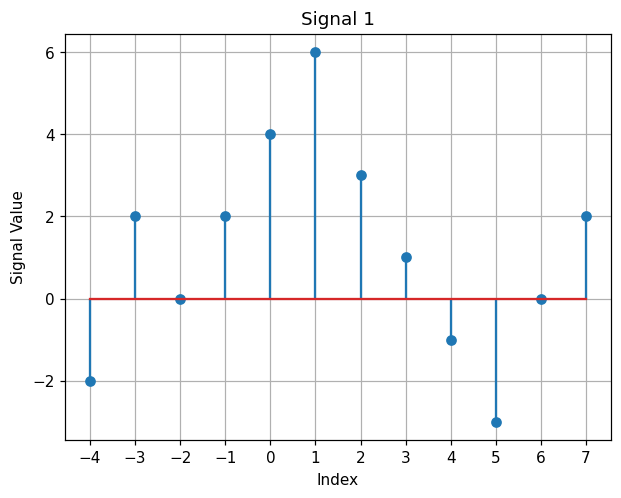

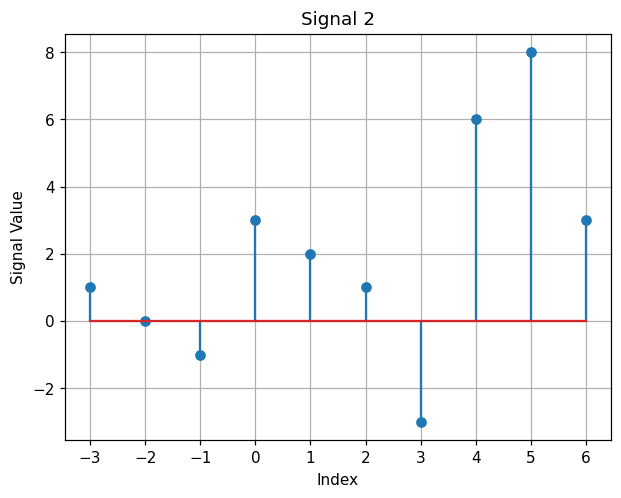

In [25]:

# Global array to hold the signals
signals = []

# Function to read the signal from the text file
def read_signal():
    file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not file_path:
        return
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    N = int(lines[2].strip())  # First row: number of samples
    indices = []
    values = []
    
    for i in range(3, N + 3):
        parts = lines[i].strip().split()
        indices.append(int(parts[0]))  # Sample index
        values.append(float(parts[1]))  # Sample value

    signals.append([indices, values])
    print(f"Signal {len(signals)} loaded.")



def plot_signal(signal_index, frame):
    times = signals[signal_index][0]
    values = signals[signal_index][1]
    
    # Create the plot using matplotlib
    fig, ax = plt.subplots()
    ax.stem(times, values)
    ax.set_xlabel('Index')
    ax.set_ylabel('Signal Value')
    ax.set_title(f'Signal {signal_index + 1}')
    ax.grid(True)
    
    # Set x-axis ticks to integer values
    ax.set_xticks(range(min(times), max(times) + 1))

    # Embed the plot into the Tkinter frame
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()

    # Add the canvas to the grid (row 5, column 0 in this case)
    canvas.get_tk_widget().grid(row=5, column=0)


# Function to add two signals
def add_signals(signal1_index, signal2_index):
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[signal2_index]

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    #plot_signal(len(signals) - 1)
    AddSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)

# Function to multiply a signal by a constant
def multiply_signal(signal_index, constant,view=1):
    indices, values = signals[signal_index]
    new_values = [val * constant for val in values]
    signals.append([indices, new_values])
    if view:
        #plot_signal(len(signals) - 1)
        MultiplySignalByConst(5,indices, new_values)
   

# Function to subtract two signals
def subtract_signals(signal1_index, signal2_index):
    indices, values = signals[signal2_index]
    new_values = [val * -1 for val in values]
    signals.append([indices, new_values])
    
    #multiply_signal(signal2_index, -1,0)
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[len(signals)-1]

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    
    #add_signals(signal1_index, len(signals) - 1)


    SubSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)



# Function to shift a signal by k steps
def shift_signal(signal_index, k):
    indices, values = signals[signal_index]
    tempk = k*-1
    new_indices = [idx + tempk for idx in indices]
    signals.append([new_indices, values])
    #plot_signal(len(signals) - 1)
    ShiftSignalByConst(k,new_indices,values)


def fold_signal(signal_index):
    indices, values = signals[signal_index]
    
    # Reverse indices by negating and creating a list of (negated index, value) pairs
    pairs = [(-idx, val) for idx, val in zip(indices, values)]
    
    # Sort based on the negated indices (first element of each pair)
    pairs.sort(key=lambda pair: pair[0])
    
    # Separate the sorted pairs into indices and values
    new_indices, new_values = zip(*pairs)  # This unzips the pairs into two lists
    
    # Append the reversed signal to the list of signals
    signals.append([list(new_indices), list(new_values)])
    
    # Call the plot function to visualize the result
    #plot_signal(len(signals) - 1)
    Folding(new_indices, new_values)


# Function to save the last generated signal to a text file
def save_signal():
    if not signals:
        print("No signal to save!")
        return
    
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
    if not file_path:
        return

    indices, values = signals[-1]
    with open(file_path, 'w') as file:
        file.write(f"{len(indices)}\n")
        for idx, val in zip(indices, values):
            file.write(f"{idx} {val}\n")
    print(f"Signal saved to {file_path}")

# Creating the main Tkinter window
root = tk.Tk()
root.title("Signal Reader")

# Set the window size to fill the screen (without hiding the title bar)
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.geometry(f"{int(screen_width)}x{screen_height}")

# Entry fields for signal index and operation value
signal_number_label = tk.Label(root, text="Signal One Number:")
signal_number_label.grid(row=0, column=0, padx=5, pady=5)
signal_number_entry = tk.Entry(root)
signal_number_entry.grid(row=0, column=1, padx=5, pady=5)

operation_value_label = tk.Label(root, text="Operation Value/Signal Two Number:")
operation_value_label.grid(row=0, column=2, padx=5, pady=5)
operation_value_entry = tk.Entry(root)
operation_value_entry.grid(row=0, column=3, padx=5, pady=5)

# Buttons for signal operations
button_read = tk.Button(root, text="Read Signal", command=read_signal)
button_read.grid(row=1, column=0, padx=5, pady=10)

frame = tk.Frame(root)
frame.grid(row=5, column=0,columnspan=4)

button_display = tk.Button(root, text="View Signal", command=lambda: plot_signal(int(signal_number_entry.get()) - 1,frame))
button_display.grid(row=1, column=1, padx=5, pady=10)

button_add = tk.Button(root, text="Add Signals", command=lambda: add_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1))
button_add.grid(row=2, column=0, padx=5, pady=10)

button_multiply = tk.Button(root, text="Multiply Signal", command=lambda: multiply_signal(int(signal_number_entry.get()) - 1, float(operation_value_entry.get())))
button_multiply.grid(row=2, column=1, padx=5, pady=10)

button_subtract = tk.Button(root, text="Subtract Signals", command=lambda: subtract_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1))
button_subtract.grid(row=3, column=0, padx=5, pady=10)

button_shift = tk.Button(root, text="Shift Signal", command=lambda: shift_signal(int(signal_number_entry.get()) - 1, int(operation_value_entry.get())))
button_shift.grid(row=3, column=1, padx=5, pady=10)

button_fold = tk.Button(root, text="Fold Signal", command=lambda: fold_signal(int(signal_number_entry.get()) - 1))
button_fold.grid(row=4, column=0, padx=5, pady=10)

# Button to save the output signal
button_save = tk.Button(root, text="Save Signal", command=save_signal)
button_save.grid(row=4, column=1, padx=5, pady=10)



# Start the Tkinter event loop
root.mainloop()
